In [1]:
import sys
sys.path.append('../sample/')
from metropolis_sampler import MetropolisSampler

from random import uniform, gauss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_state(dim):
  
    return np.array([uniform(-10, 10) for i in range(dim)])


def markov_process(x, step_length):

    result = x.copy()
    
    for i, item in enumerate(result):
        
        result[i] = item + gauss(0, 1) * step_length  
    
    return result

In [6]:
def N(mu, sigma):
    """ float * float -> ([float] -> float)
    """
    return lambda x: np.exp(- np.sum(np.square((x - mu) / sigma)))


## Recall SimulatedAnnealing is searching the argmin, instead of argmax.
def target_function(x):
    """ [float] -> float
    """
    return 1 * N(-5, 5)(x) + 10 * N(5, 5)(x)

def log_target_distribution(T):
    """ float -> ([float] -> float)
    """
    return lambda x: np.log(target_function(x))

In [37]:
def sampling(iterations, burn_in, dim, step_length, T):
    
    def initialize_state_0():
        return initialize_state(dim)
    
    def markov_process_0(x):
        return markov_process(x, step_length)

    ms = MetropolisSampler(iterations,
                           initialize_state_0,
                           markov_process_0,
                           burn_in,
                           log=False,
                           )
    chain = ms.sampling(log_target_distribution(T))
    print('Accept Ratio: {0}'.format(ms.accept_ratio))
    
    return chain

In [39]:
dim = 300

## Needs tuning
iterations = int(10 ** 5 * 1)
burn_in = int(0.5 * iterations)
step_length = 0.05
T = 1


chain = sampling(iterations, burn_in, dim, step_length, T)
print('Lengh of chain: {0}'.format(len(chain)))

expect = [np.mean([state[axis] for state in chain])
          for axis in range(dim)
         ]

print('Expects: {0}'.format(expect))

Accept Ratio: 0.89618
Lengh of chain: 50001
Expects: [3.0067161074918647, 6.2320824968266413, 4.986068128271226, 7.1327881876491857, 5.8452986489863026, 6.0829959451377205, 4.868576040734486, 4.5672060695001546, 2.9560042930516257, 5.8602425087711589, 8.0738318383851446, 6.6036025174869986, 2.3889684166855769, 4.9707734440606064, -0.97407990435190694, 3.6818177915237378, 3.7017384242656526, 6.4885749573466054, 5.4438147828511712, 6.9021638635202276, 5.014819486442355, 2.5906733895744836, 2.9245294428785256, 6.0448518131563942, 6.0710505251056333, 4.5038066086773458, 3.9921356480775532, 4.2976243814341704, 6.448576131779526, 8.4715295077643091, 4.9759081171604205, 2.4788079878479072, 12.29599405383243, 3.5538192012603003, 6.4561750564408946, 6.116800895331159, 4.431466625505184, 6.729569687495303, 9.7249446001846014, 3.4638984282780858, 4.2957008856833481, 8.2860009908676098, 4.5480736616982043, 3.5149210797312764, 6.2300795475775246, 4.2804158574898663, 3.0569641521163033, 2.1369476472

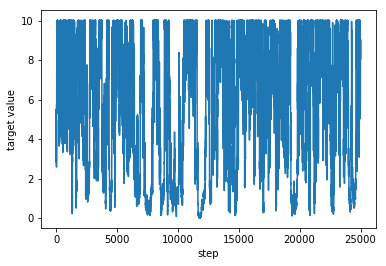

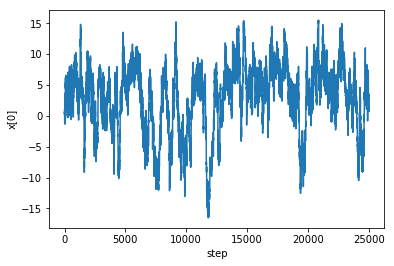

In [11]:
steps = np.arange(len(chain))
targets = [target_function(state) for state in chain]


plt.plot(steps, targets)
plt.xlabel('step')
plt.ylabel('target value')
plt.show()


for axis in range(dim):
    
    xs = [state[axis] for state in chain]

    plt.plot(steps, xs)
    plt.xlabel('step')
    plt.ylabel('x[{0}]'.format(axis))
    plt.show()

Splendid, even for `dim = 10`.